In [208]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
df = pd.read_csv('data/stroke_dataset.csv')

In [210]:
df.shape

(4981, 11)

In [211]:
df.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [212]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


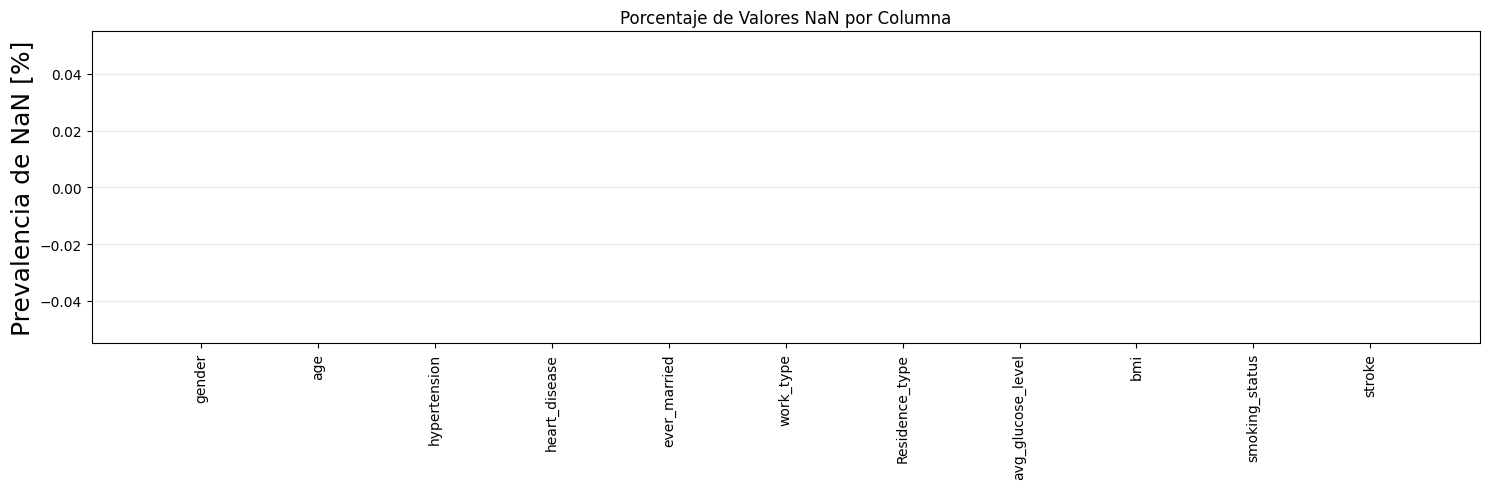

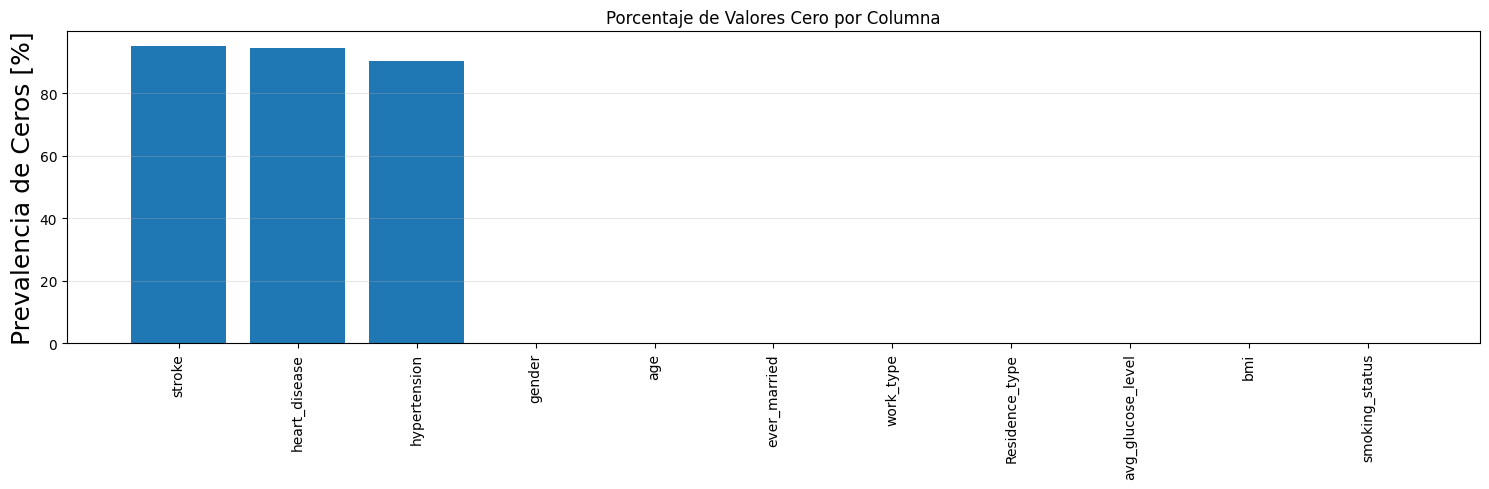

In [213]:
# Calcular el porcentaje de NaN y ceros
total_nans = df.isnull().sum().sort_values(ascending=False)
percent_nans = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (df.isin([0]).sum() / df.isin([0]).count() * 100).sort_values(ascending=False)

# Crear DataFrames para estadísticas de NaN y ceros
df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Porcentaje NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Ceros', 'Porcentaje Ceros'])

# Graficar porcentajes de NaN
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_nans)), df_nans['Porcentaje NaN'].values)
plt.xticks(np.arange(len(df_nans)), df_nans.index, rotation='vertical')
plt.ylabel('Prevalencia de NaN [%]', fontsize=18)
plt.title('Porcentaje de Valores NaN por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
plt.close()

# Graficar porcentajes de Ceros
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_zeros)), df_zeros['Porcentaje Ceros'].values)
plt.xticks(np.arange(len(df_zeros)), df_zeros.index, rotation='vertical')
plt.ylabel('Prevalencia de Ceros [%]', fontsize=18)
plt.title('Porcentaje de Valores Cero por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



                   Total Unknown  Porcentaje Unknown
smoking_status              1500           30.114435
gender                         0            0.000000
age                            0            0.000000
hypertension                   0            0.000000
heart_disease                  0            0.000000
ever_married                   0            0.000000
work_type                      0            0.000000
Residence_type                 0            0.000000
avg_glucose_level              0            0.000000
bmi                            0            0.000000
stroke                         0            0.000000


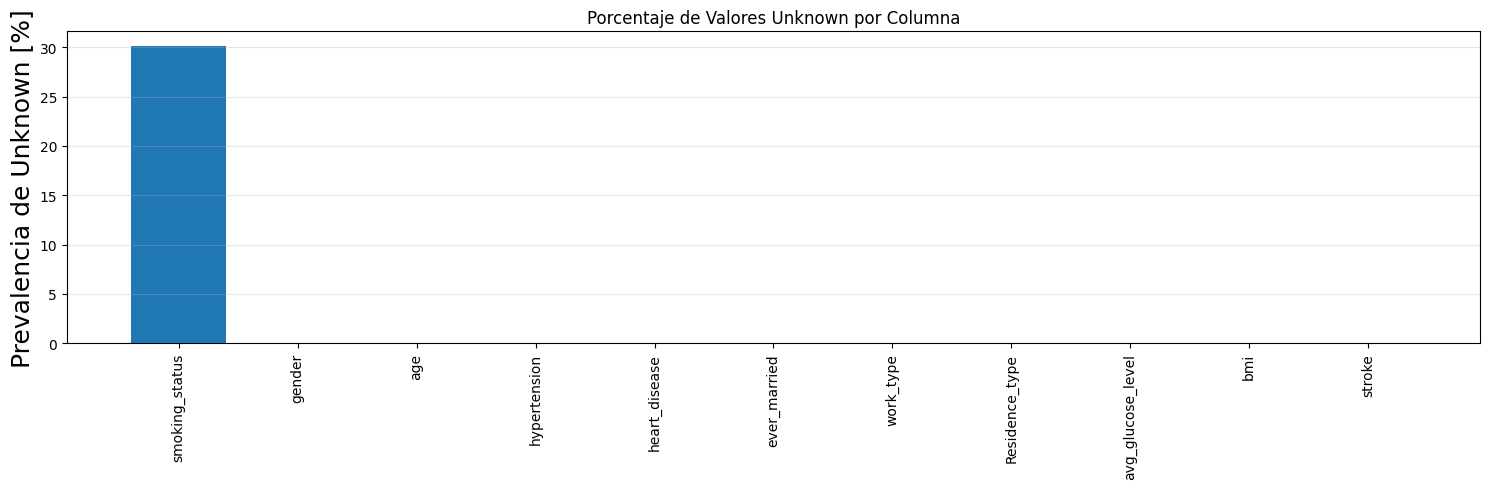

In [214]:
# Calcular el número de valores "Unknown" en cada columna
total_unknowns = df.isin(['Unknown']).sum().sort_values(ascending=False)

# Calcular el porcentaje de valores "Unknown" en cada columna
percent_unknowns = (df.isin(['Unknown']).sum() / df.isin(['Unknown']).count() * 100).sort_values(ascending=False)

# Crear DataFrame para estadísticas de valores "Unknown"
df_unknowns = pd.concat([total_unknowns, percent_unknowns], axis=1, keys=['Total Unknown', 'Porcentaje Unknown'])

# Mostrar el DataFrame con las estadísticas de "Unknown"
print(df_unknowns)

# Graficar porcentajes de "Unknown"
plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_unknowns)), df_unknowns['Porcentaje Unknown'].values)
plt.xticks(np.arange(len(df_unknowns)), df_unknowns.index, rotation='vertical')
plt.ylabel('Prevalencia de Unknown [%]', fontsize=18)
plt.title('Porcentaje de Valores Unknown por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [215]:
#División entre columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print('Columnas Numéricas:')
print(numerical_cols.tolist())
print('')
print('Columnas Categóricas:')
print(categorical_cols.tolist())

Columnas Numéricas:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

Columnas Categóricas:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [216]:
#Comprobamos filas duplicadas
df.duplicated().sum()

0

In [217]:
# A modo de ejemplo resumimos las columnas categóricas
df[categorical_cols].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


In [218]:
def classify_age(age):
    if age <= 18:
        return 'Children and Teens'
    elif 18 < age < 35:
        return 'Young Adults'
    elif 35 < age < 65:
        return 'Adults'
    elif 65 <= age < 70:
        return 'Seniors 65-69'
    elif 70 <= age < 75:
        return 'Seniors 70-74'
    elif 75 <= age < 80:
        return 'Seniors 75-79'
    elif 80 <= age < 85:
        return 'Seniors 80-84'
    else:
        return 'Seniors 85+'


df['age_category'] = df['age'].apply(classify_age)


print(df[['age', 'age_category']])

       age   age_category
0     67.0  Seniors 65-69
1     80.0  Seniors 80-84
2     49.0         Adults
3     79.0  Seniors 75-79
4     81.0  Seniors 80-84
...    ...            ...
4976  41.0         Adults
4977  40.0         Adults
4978  45.0         Adults
4979  40.0         Adults
4980  80.0  Seniors 80-84

[4981 rows x 2 columns]


In [219]:

def classify_glucose(age_category, glucose_level):
    if age_category == 'Children and Teens' or age_category == 'Young Adults' or age_category == 'Adults':
        if glucose_level < 90:
            return 'Bajo'
        elif 90 <= glucose_level < 130:
            return 'Normal'
        else:
            return 'Alto'
    elif age_category.startswith('Seniors'):
        if glucose_level < 80:
            return 'Bajo'
        elif 80 <= glucose_level < 110:
            return 'Normal'
        else:
            return 'Alto'
    else:
        return 'Unknown'


df['glucose_category'] = df.apply(lambda row: classify_glucose(row['age_category'], row['avg_glucose_level']), axis=1)


print(df[['age_category', 'avg_glucose_level', 'glucose_category']].head())


    age_category  avg_glucose_level glucose_category
0  Seniors 65-69             228.69             Alto
1  Seniors 80-84             105.92           Normal
2         Adults             171.23             Alto
3  Seniors 75-79             174.12             Alto
4  Seniors 80-84             186.21             Alto


In [220]:
import pandas as pd


def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    elif 30 <= bmi < 35:
        return 'Obese Class I'
    elif 35 <= bmi < 40:
        return 'Obese Class II'
    else:
        return 'Obese Class III'


df['bmi_category'] = df['bmi'].apply(classify_bmi)


print(df[['bmi', 'bmi_category']].head(10))


    bmi    bmi_category
0  36.6  Obese Class II
1  32.5   Obese Class I
2  34.4   Obese Class I
3  24.0          Normal
4  29.0      Overweight
5  27.4      Overweight
6  22.8          Normal
7  24.2          Normal
8  29.7      Overweight
9  36.8  Obese Class II


In [221]:
#División entre columnas numéricas y categóricas
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print('Columnas Numéricas:')
print(numerical_cols.tolist())
print('')
print('Columnas Categóricas:')
print(categorical_cols.tolist())

Columnas Numéricas:
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

Columnas Categóricas:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'age_category', 'glucose_category', 'bmi_category']


In [222]:
import pandas as pd
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

df['smoking_status'].replace('Unknown', pd.NA, inplace=True)

smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2}
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

df['smoking_status'].fillna(-1, inplace=True)  
print(df['smoking_status'].unique())

df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

df['Residence_type'] = df['Residence_type'].astype('category').cat.codes

age_mapping = {
    'age_category_Children and Teens': 'Children and Teens',
    'age_category_Adults': 'Adults', 
    'age_category_Young Adults': 'Young Adults',
    'age_category_Seniors 65-69': 'Seniors 65-69',
    'age_category_Seniors 70-74': 'Seniors 70-74',
    'age_category_Seniors 75-79': 'Seniors 75-79',
    'age_category_Seniors 80-84': 'Seniors 80-84'
}
df['age_category_Young Adults'] = ((df['age'] > 18) & (df['age'] < 35)).astype(int)
df['age_category_Adults'] = ((df['age'] > 35) & (df['age'] < 65)).astype(int)

age_category_columns = [col for col in age_mapping.keys() if col in df.columns]

if age_category_columns:
    df['age_category'] = df[age_category_columns].idxmax(axis=1).map(age_mapping)

bmi_mapping = {
    'bmi_category_Underweight': 'Underweight',
    'bmi_category_Normal': 'Normal',
    'bmi_category_Obese Class I': 'Obese Class I',
    'bmi_category_Obese Class II': 'Obese Class II',
    'bmi_category_Obese Class III': 'Obese Class III',
    'bmi_category_Overweight': 'Overweight',
}

bmi_category_columns = [col for col in bmi_mapping.keys() if col in df.columns]
if bmi_category_columns:
    df['bmi_category'] = df[bmi_category_columns].idxmax(axis=1).map(bmi_mapping)

if 'ever_married_Yes' in df.columns:
    df['ever_married'] = df['ever_married_Yes'].map({True: 'Yes', False: 'No'})


if 'gender_Male' in df.columns:
    df['gender'] = df['gender_Male'].map({True: 'Male', False: 'Female'})

glucose_mapping = {
    'glucose_category_Bajo': 'Bajo',
    'glucose_category_Alto': 'Alto',
    'glucose_category_Normal': 'Normal'
}
glucose_category_columns = [col for col in glucose_mapping.keys() if col in df.columns]
if glucose_category_columns:
    df['glucose_category'] = df[glucose_category_columns].idxmax(axis=1).map(glucose_mapping)

work_mapping = {
    'work_type_Private': 'Private',
    'work_type_Self-employed': 'Self-employed',
    'work_type_children': 'Children',
    'work_type_Govt_job': 'Govt_job'
}


work_type_columns = [col for col in work_mapping.keys() if col in df.columns]

if work_type_columns:
    df['work_type'] = df[work_type_columns].idxmax(axis=1).map(work_mapping)


imputer = KNNImputer(n_neighbors=2)
df_numeric = df.select_dtypes(include=['int64'])  
imputed_values = imputer.fit_transform(df_numeric)

df_imputed = pd.DataFrame(imputed_values, columns=df_numeric.columns)

categorical_columns = df.columns.difference(df_numeric.columns)
df_imputed = pd.concat([df_imputed, df[categorical_columns].reset_index(drop=True)], axis=1)


df_encoded = pd.get_dummies(df_imputed, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 
                                                 'smoking_status', 'age_category', 'bmi_category', 
                                                 'glucose_category'], drop_first=True)
df_encoded = df_encoded.drop_duplicates()

columns_to_drop = ['age', 'bmi', 'avg_glucose_level']
df_cleaned = df_encoded.drop(columns=columns_to_drop)


X = df_cleaned.drop('stroke', axis=1) 
y = df_cleaned['stroke']

smote = SMOTE(sampling_strategy='auto', random_state=1337)
X_resampled, y_resampled = smote.fit_resample(X, y)

final_df = pd.concat([X_resampled, y_resampled], axis=1)


print(final_df.head())
print(final_df.isna().sum())  



[ 0.  1.  2. -1.]


C:\Users\iryna\AppData\Local\Temp\ipykernel_4872\1638559006.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoking_status'].replace('Unknown', pd.NA, inplace=True)
C:\Users\iryna\AppData\Local\Temp\ipykernel_4872\1638559006.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

   hypertension  heart_disease  age_category_Adults  gender_Male  \
0           0.0            1.0                    0         True   
1           0.0            1.0                    0         True   
2           0.0            0.0                    1        False   
3           1.0            0.0                    0        False   
4           0.0            0.0                    0         True   

   ever_married_Yes  work_type_Private  work_type_Self-employed  \
0              True               True                    False   
1              True               True                    False   
2              True               True                    False   
3              True              False                     True   
4              True               True                    False   

   work_type_children  Residence_type_1  smoking_status_0.0  \
0               False              True                True   
1               False             False               False   

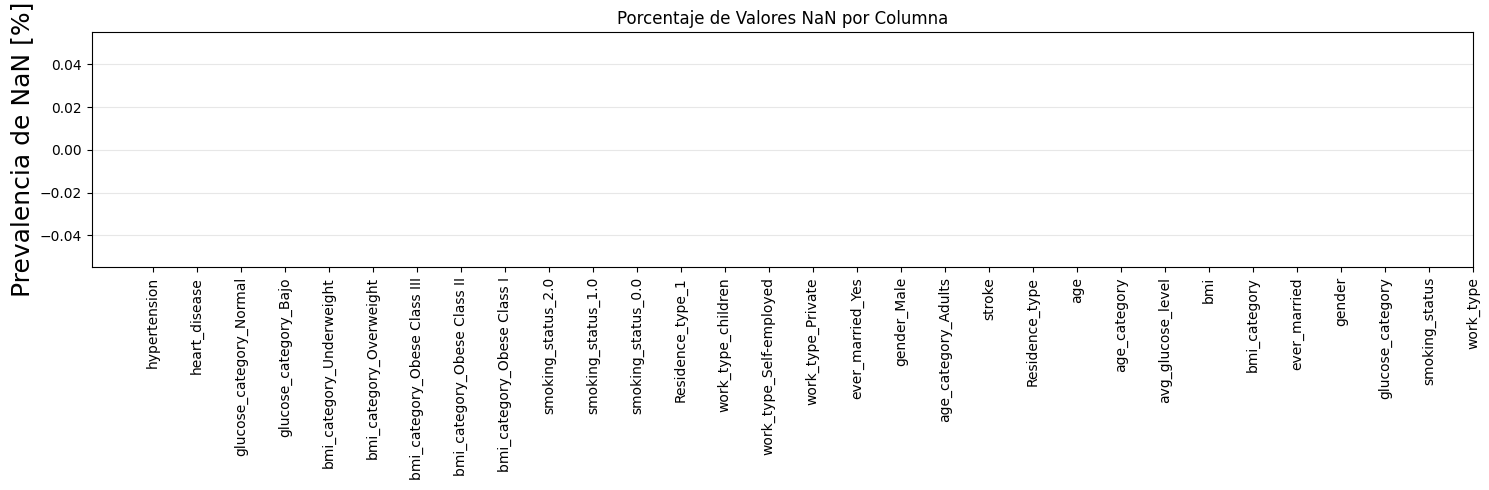

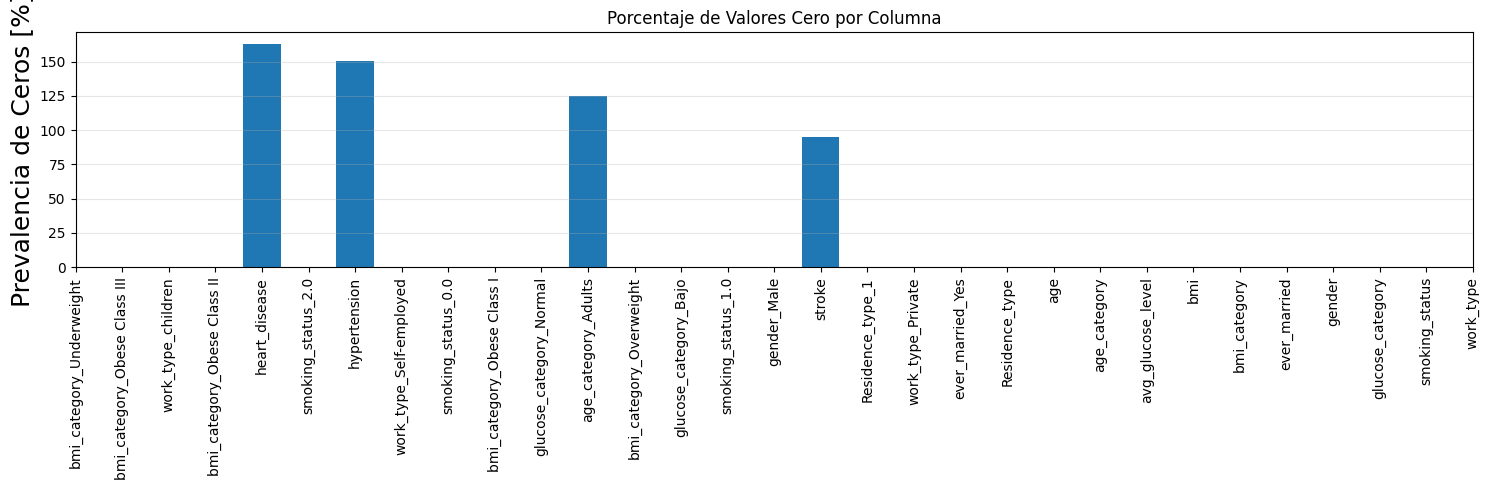

In [223]:

total_nans = final_df.isnull().sum().sort_values(ascending=False)
percent_nans = (final_df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
total_zeros = final_df.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (final_df.isin([0]).sum() / df.isin([0]).count() * 100).sort_values(ascending=False)

df_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Porcentaje NaN'])
df_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Ceros', 'Porcentaje Ceros'])

plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_nans)), df_nans['Porcentaje NaN'].values)
plt.xticks(np.arange(len(df_nans)), df_nans.index, rotation='vertical')
plt.ylabel('Prevalencia de NaN [%]', fontsize=18)
plt.title('Porcentaje de Valores NaN por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
plt.close()


plt.figure(figsize=(15, 5))
plt.bar(np.arange(len(df_zeros)), df_zeros['Porcentaje Ceros'].values)
plt.xticks(np.arange(len(df_zeros)), df_zeros.index, rotation='vertical')
plt.ylabel('Prevalencia de Ceros [%]', fontsize=18)
plt.title('Porcentaje de Valores Cero por Columna')
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()



Matriz de correlación:
                              hypertension  heart_disease  \
hypertension                      1.000000       0.049456   
heart_disease                     0.049456       1.000000   
age_category_Adults              -0.094584      -0.092578   
gender_Male                      -0.010357       0.148652   
ever_married_Yes                  0.130934       0.129387   
work_type_Private                -0.071338       0.102929   
work_type_Self-employed           0.213047      -0.013597   
work_type_children               -0.135950      -0.104922   
Residence_type_1                  0.034072       0.047378   
smoking_status_0.0                0.039061       0.051261   
smoking_status_1.0                0.146962      -0.075618   
smoking_status_2.0               -0.001599       0.120437   
bmi_category_Obese Class I        0.075518       0.086204   
bmi_category_Obese Class II       0.054335       0.089910   
bmi_category_Obese Class III      0.092179      -0.037394   
b

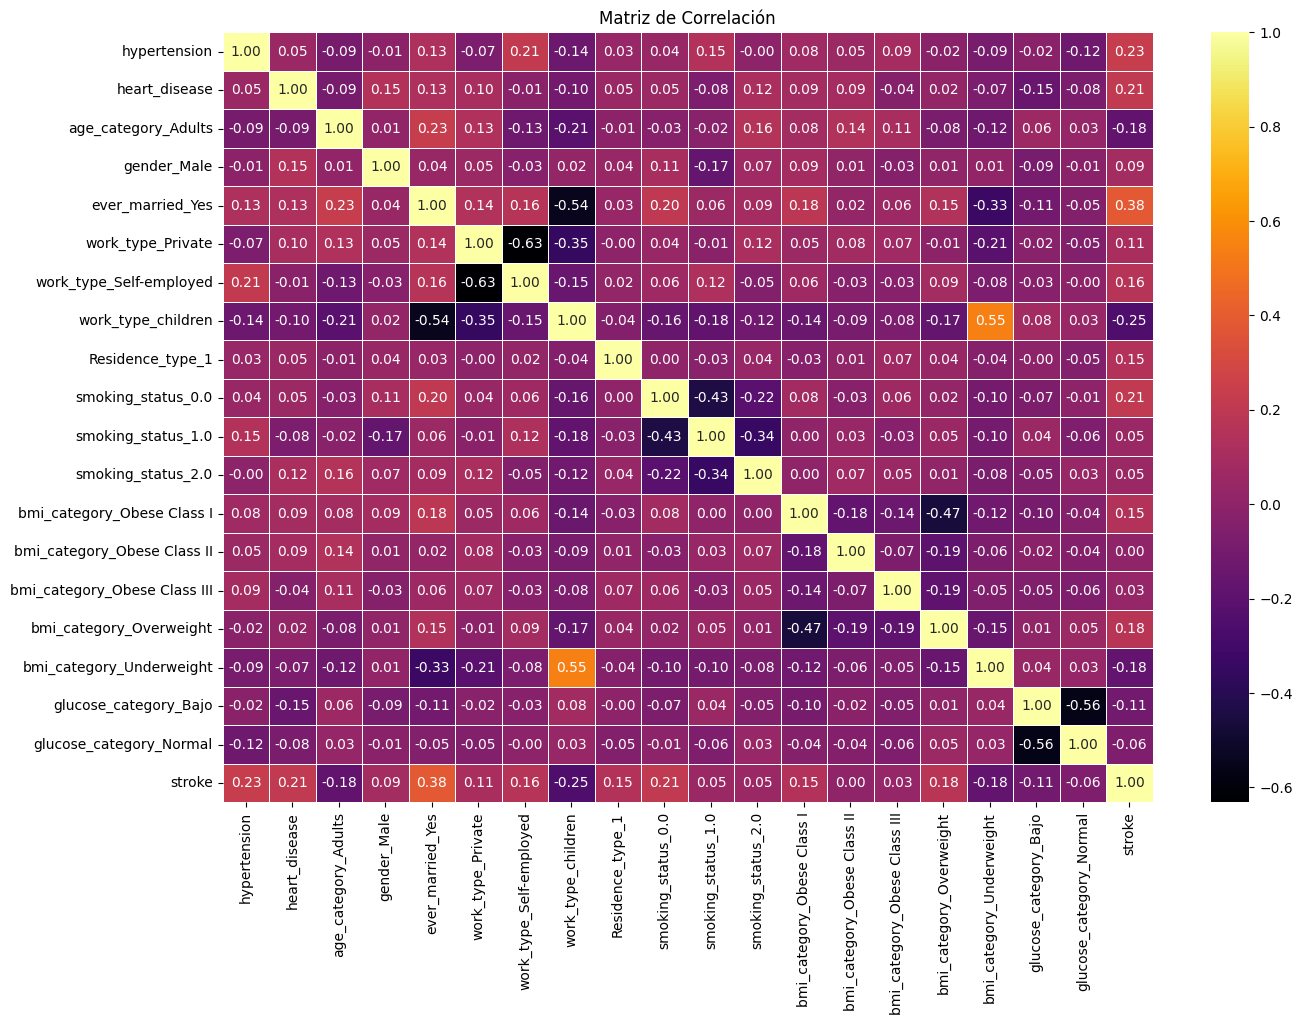

In [224]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calcula la matriz de correlación
correlation_matrix = final_df.corr()

# Imprime la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [225]:

columns_to_drop = ['age', 'bmi', 'avg_glucose_level', 'age_category_Children and Teens', 'work_type_children']
df_cleaned = final_df.drop(columns=columns_to_drop, errors='ignore')  

print("Columns after dropping:", df_cleaned.columns)


Columns after dropping: Index(['hypertension', 'heart_disease', 'age_category_Adults', 'gender_Male',
       'ever_married_Yes', 'work_type_Private', 'work_type_Self-employed',
       'Residence_type_1', 'smoking_status_0.0', 'smoking_status_1.0',
       'smoking_status_2.0', 'bmi_category_Obese Class I',
       'bmi_category_Obese Class II', 'bmi_category_Obese Class III',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'glucose_category_Bajo', 'glucose_category_Normal', 'stroke'],
      dtype='object')


In [227]:
df_cleaned.shape
df_cleaned.describe

<bound method NDFrame.describe of       hypertension  heart_disease  age_category_Adults  gender_Male  \
0         0.000000       1.000000                    0         True   
1         0.000000       1.000000                    0         True   
2         0.000000       0.000000                    1        False   
3         1.000000       0.000000                    0        False   
4         0.000000       0.000000                    0         True   
...            ...            ...                  ...          ...   
9461      1.000000       0.789182                    0         True   
9462      0.747931       0.000000                    0         True   
9463      0.000000       1.000000                    0         True   
9464      0.311070       0.000000                    0         True   
9465      1.000000       0.000000                    0        False   

      ever_married_Yes  work_type_Private  work_type_Self-employed  \
0                 True               True  

In [229]:
#df_cleaned.to_csv('data/cleaned_dataset_v3.csv', index=False)